# REAL-TIME FACE DETECTION PROJECT WITH PYTHON USING OPENCV

In this project, I am using OpenCV to perform the features below:

- Detect single to multiple human faces in a given input image

- Perform real-time face detection using the user's local computer's camera

## Method: Haar Cascade Classifiers

- The idea is basically using a cascade of classifiers to detect different features in an image. These classifiers are then combined into one strong classifier that can accurately distinguish between samples that contain a human face from those that don't. Since the Haar Cascade classifier that is built into OpenCV has already been trained on a large dataset of human faces, so no further training is required. We just need to load the classifier from the library and use it to perform face detection on an input image.



In [1]:
#import the necessary libraries
import cv2
import matplotlib 

In [ ]:
#Read the image with OpenCV's imread() function
imagePath = 'input_image.jpeg'

img = cv2.imread(imagePath) #this function loads 

img.shape 

(4032, 3024, 3)

In [3]:

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_image.shape

(4032, 3024)

In [4]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [5]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

(-0.5, 3023.5, 4031.5, -0.5)

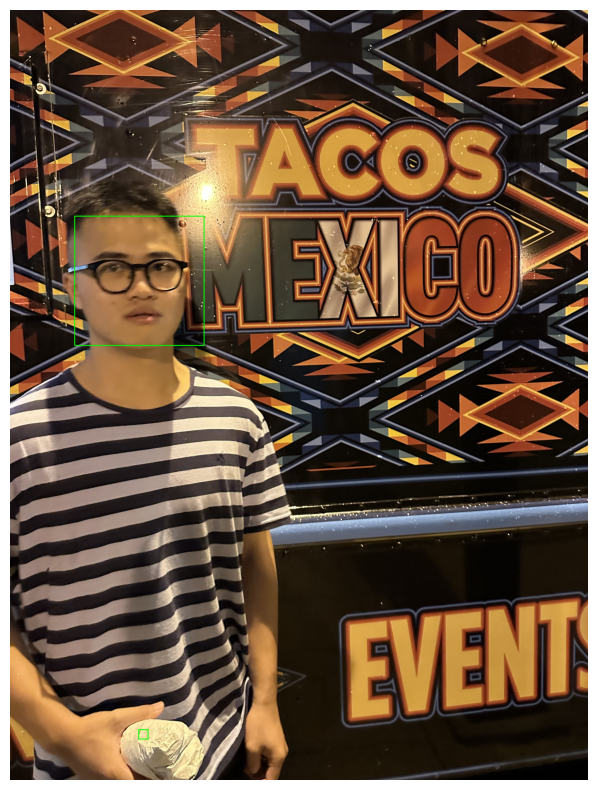

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

## Implement the Real-time Face Detection feature using the local machine's webcam

In [ ]:
#Function to identify the faces in the video stream
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [ ]:
video_capture = cv2.VideoCapture(0)

while True:
    # Read frames from the video
    result, video_frame = video_capture.read()  
    if result is False:
        break  

    faces = detect_bounding_box(
        video_frame
    ) 

    # display the processed frame in a window named "My Face Detection Project"
    cv2.imshow(
        "My Face Detection Project", video_frame
    )  

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()